<a href="https://colab.research.google.com/github/VanshGupta-2404/Bank_of_Baroda_hackathon/blob/main/imagegenerator_Azure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np


np.random.seed(42)

ages = np.random.randint(18, 65, 5000)
genders = np.random.choice(['Male', 'Female'], 5000)
locations = np.random.choice(['Delhi', 'Mumbai', 'Hyderabad', 'Jaipur', 'Gujarat'], 5000)
income_levels = np.random.choice(['Low', 'Medium', 'High'], 5000)
occupations = np.random.choice(['Engineer', 'Manager', 'Analyst', 'Executive', 'Student', 'Software Engineer'], 5000)
transaction_histories = np.random.choice(['Frequent', 'Occasional', 'Rare'], 5000)
product_usages = np.random.choice(['Credit Card', 'Loan'], 5000)
online_activities = np.random.choice(['High', 'Medium', 'Low'], 5000)
offline_activities = np.random.choice(['High', 'Medium', 'Low'], 5000)
interaction_histories = np.random.choice(['Frequent', 'Occasional', 'Rare'], 5000)
lifestyles = np.random.choice(['Urban', 'Suburban', 'Rural'], 5000)
financial_goals = np.random.choice(['Saving', 'Investing', 'Luxury Vacation'], 5000)
interests = np.random.choice(['Tech', 'Finance', 'Travel', 'Sports'], 5000)
email_open_rates = np.random.rand(5000)
click_through_rates = np.random.rand(5000)
app_usages = np.random.choice(['Daily', 'Weekly', 'Monthly'], 5000)
social_media_interactions = np.random.choice(['Active', 'Inactive'], 5000)
product_preferences = product_usages

data = {
    'Age': ages,
    'Gender': genders,
    'Location': locations,
    'Income Level': income_levels,
    'Occupation': occupations,
    'Transaction History': transaction_histories,
    'Product Usage': product_usages,
    'Online Activity': online_activities,
    'Offline Activity': offline_activities,
    'Interaction History': interaction_histories,
    'Lifestyle': lifestyles,
    'Financial Goals': financial_goals,
    'Interests': interests,
    'Email Open Rate': email_open_rates,
    'Click Through Rate': click_through_rates,
    'App Usage': app_usages,
    'Social Media Interactions': social_media_interactions,
    'Product Preference': product_preferences
}

df = pd.DataFrame(data)
df.to_csv('synthetic_banking_data.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


df = pd.read_csv('synthetic_banking_data.csv')

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


X = df.drop('Product Preference', axis=1)
y = df['Product Preference']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

if accuracy < 0.90:
    print("Model accuracy is less than 90%. Consider tuning the model parameters or using a different algorithm.")


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       507
           1       1.00      1.00      1.00       493

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



Predicted Product Preference: Credit Card


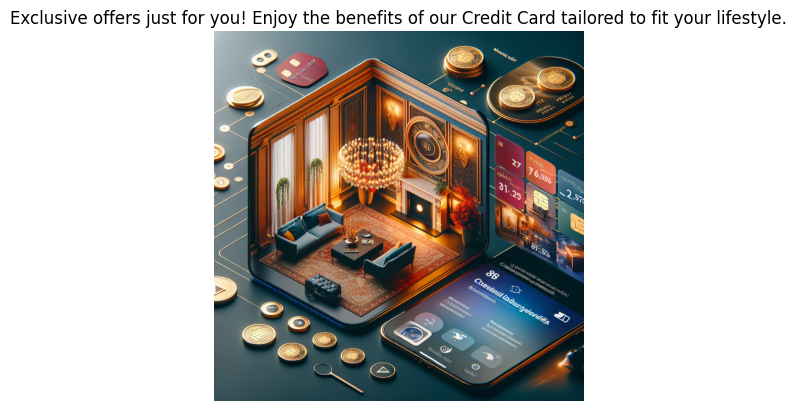

In [ ]:
import os
import requests
import json
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
from openai import AzureOpenAI
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('synthetic_banking_data.csv')

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


X = df.drop('Product Preference', axis=1)
y = df['Product Preference']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

api_key = "//API Key"
os.environ["AZURE_OPENAI_API_KEY"] = api_key
azure_endpoint = "https://final.openai.azure.com/"
api_version = "2024-02-01"

client = AzureOpenAI(
    api_version=api_version,
    azure_endpoint=azure_endpoint,
    api_key=os.environ["AZURE_OPENAI_API_KEY"],
)

def generate_attractive_banking_ad(product_preference, data):
    message = f"Exclusive offers just for you! Enjoy the benefits of our {product_preference} tailored to fit your lifestyle."

    prompt = (
        f"An attractive and stylish advertisement for a {product_preference}. "
        f"Visualize a luxurious setting with elements that represent high financial status and a tech-savvy lifestyle. "
        f"Include features like elegant credit cards, advanced banking apps on a sleek smartphone, and vibrant, inviting colors. "
        f"Highlight benefits such as premium rewards, exclusive perks, and easy management. The scene should evoke feelings of luxury and sophistication."
    )


    result = client.images.generate(
        model="Dalle3",
        prompt=prompt,
        n=1
    )

    image_url = json.loads(result.model_dump_json())['data'][0]['url']

    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))


    plt.imshow(image)
    plt.axis("off")
    plt.title(message)
    plt.show()

example_data = {
    'Age': 30,
    'Gender': 'Female',
    'Location': 'Delhi',
    'Income Level': 'High',
    'Occupation': 'Software Engineer',
    'Transaction History': 'Frequent',
    'Product Usage': 'Credit Card',
    'Online Activity': 'High',
    'Offline Activity': 'Low',
    'Interaction History': 'Frequent',
    'Lifestyle': 'Urban',
    'Financial Goals': 'Investing',
    'Interests': 'Tech',
    'Email Open Rate': 0.75,
    'Click Through Rate': 0.4,
    'App Usage': 'Daily',
    'Social Media Interactions': 'Active'
}


example_df = pd.DataFrame([example_data])
for column, le in label_encoders.items():
    if column != 'Product Preference':
        example_df[column] = le.transform(example_df[column])


predicted_preference = model.predict(example_df)[0]
predicted_preference = label_encoders['Product Preference'].inverse_transform([predicted_preference])[0]
print("Predicted Product Preference:", predicted_preference)


generate_attractive_banking_ad(predicted_preference, example_data)